In [11]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df = pd.read_csv(r'data\NASDAQ-1-YEAR- DAILY.csv',
                index_col = 0)
df.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-08,10900.700195,11131.500000,10837.200195,10847.690430,10847.690430,3872230000
2020-09-09,11064.759766,11217.690430,10970.450195,11141.559570,11141.559570,3531780000
2020-09-10,11235.530273,11299.530273,10875.019531,10919.589844,10919.589844,3814100000
2020-09-11,11010.070313,11033.040039,10728.030273,10853.549805,10853.549805,3609190000
2020-09-14,11010.139648,11118.290039,10982.259766,11056.650391,11056.650391,3716820000


In [21]:
data = df[['Adj Close']]
train_data = data['2020-09-08':'2021-01-31']

<AxesSubplot:xlabel='Date'>

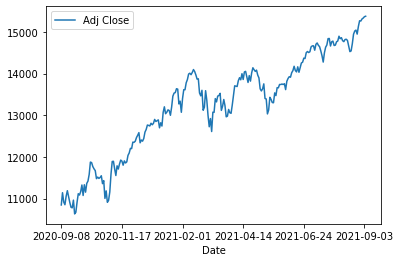

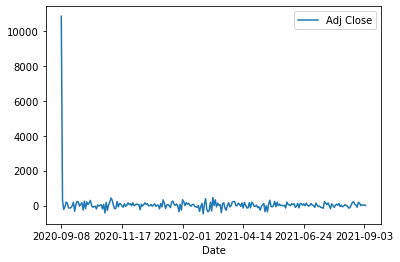

In [9]:
df_diff1 = data.diff().fillna(data)
data.plot()
df_diff2 = df_diff1.fillna(df_diff1)
df_diff2.plot()

In [3]:
from pmdarima.arima import auto_arima

In [22]:
model_auto = auto_arima(train_data)

In [23]:
model_auto

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [24]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -640.826
Date:                Thu, 23 Sep 2021   AIC                           1285.652
Time:                        14:14:39   BIC                           1290.842
Sample:                             0   HQIC                          1287.752
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.4545     16.047      1.399      0.162      -8.997      53.906
sigma2      2.454e+04   3359.449      7.305      0.000     1.8e+04    3.11e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.35   Prob(JB):                         0.45
Heteroskedasticity (H):               0.67   Skew:                            -0.29
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
warnings.filterwarnings("ignore")
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=(0, 1, 0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

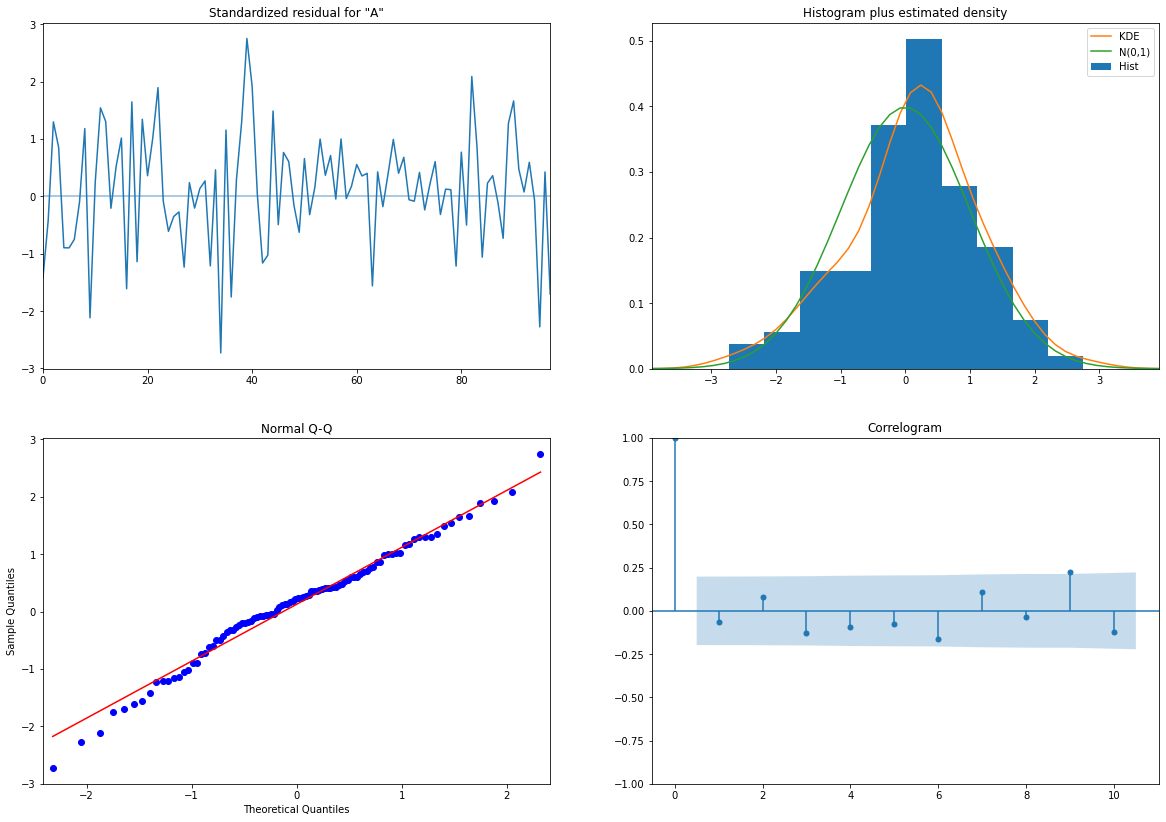

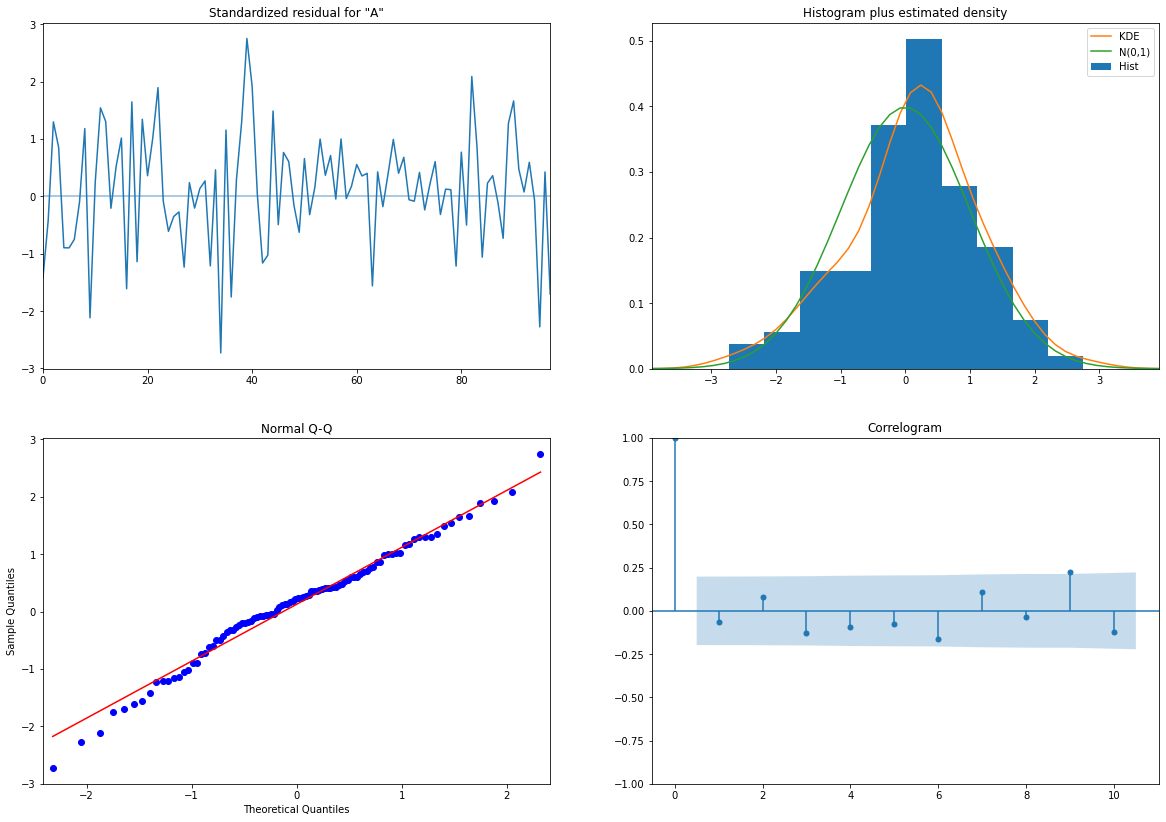

In [37]:
results.plot_diagnostics(figsize=(20, 14))

In [45]:
data.tail()

,Adj Close
Date,
2021-08-31,15259.240234
2021-09-01,15309.379883
2021-09-02,15331.179688
2021-09-03,15363.519531
2021-09-07,15374.327148


In [49]:
train_data.isnull().values.any()

False

In [48]:
pred0 = results.get_prediction(start='2021-01-25', dynamic=False)
pred0_ci = pred0.conf_int()
pred1 = results.get_prediction(start='2021-01-25', dynamic=True)
pred1_ci = pred1.conf_int()
pred2 = results.get_forecast('2021-08-31')
pred2_ci = pred2.conf_int()

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

NameError: name 'pred2' is not defined

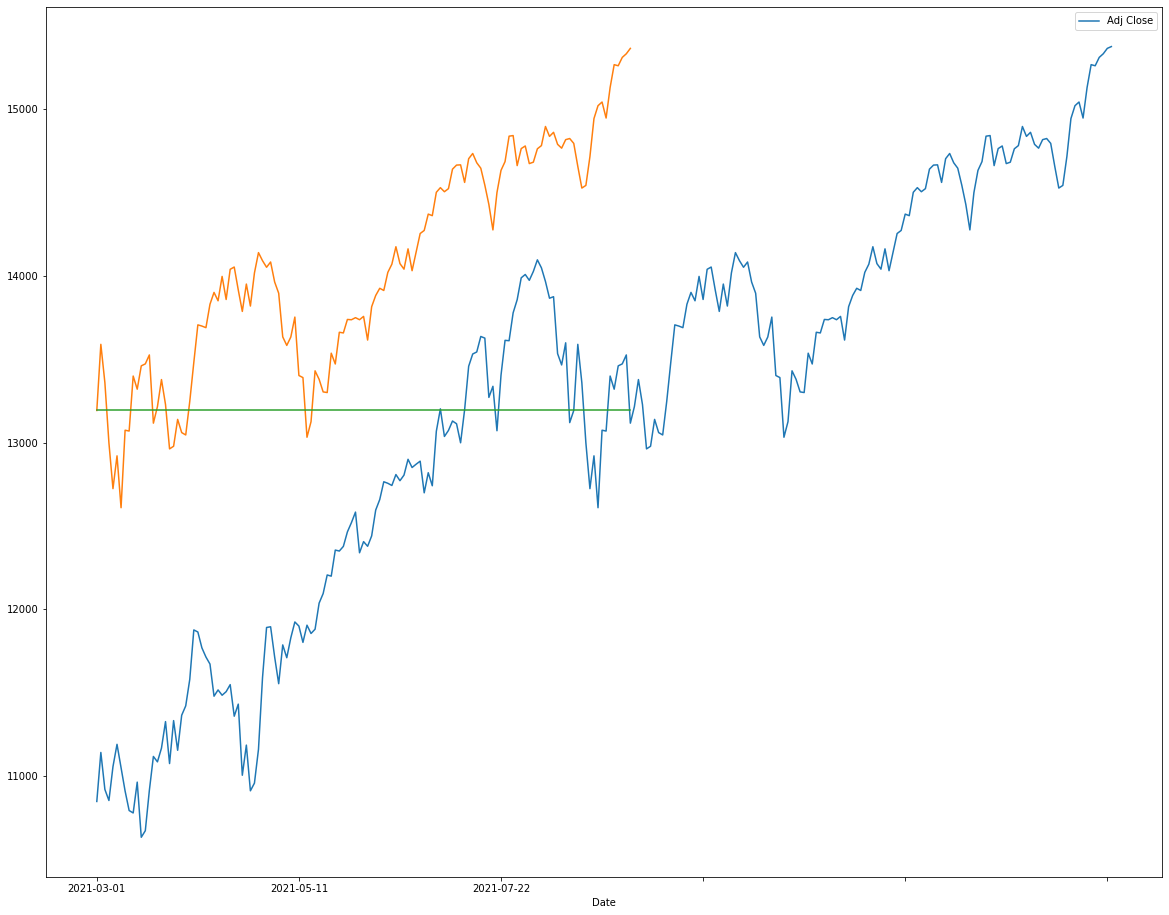

In [30]:
ax = data.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()